#**Description:**
The **iris Data frame** contains the length and width of sepals and petals including the target column which is the numerical representation of classes of df flowers that we need to classify (eg: Setosa(0), Versicolor(1), Virginica(2) ).


In [31]:
# import all the primary libraries and load the dataset from sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris= load_iris()
iris.keys()

dict_keys=(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
# converting the data into a workable dataframe using pandas and display top 5 datapoints
iris= pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
 # defining the species names
 species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

In [5]:
#Groups the different species names with respect to size of each datapoints. Useful to do distribution ana
iris.groupby('species').size()

,0
species,
setosa,50
versicolor,50
virginica,50


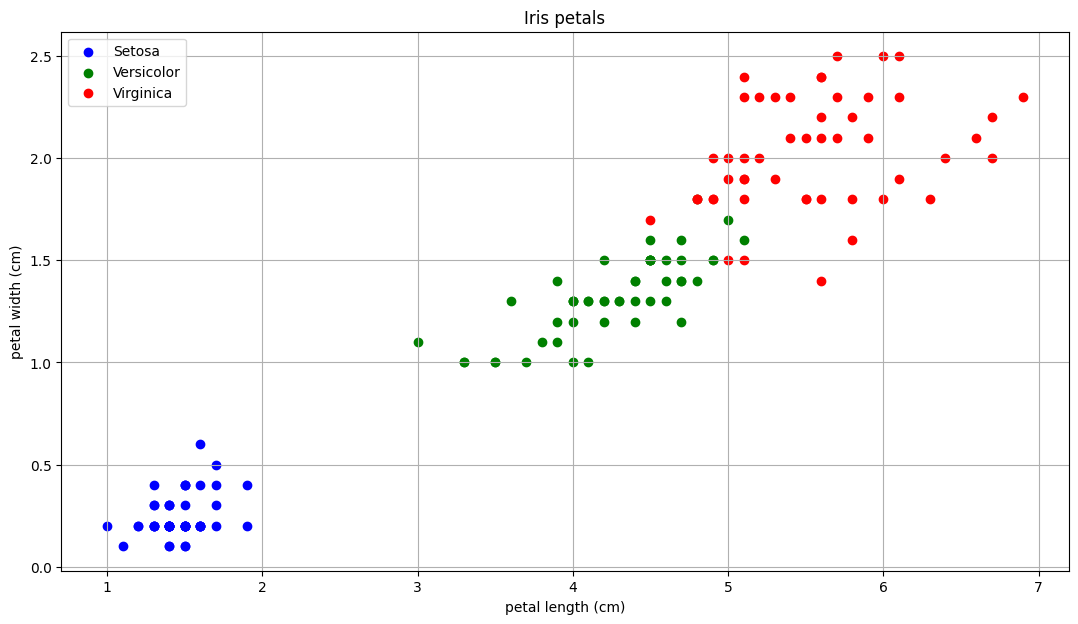

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [7]:
from sklearn.model_selection import train_test_split
# Droping the target and species since we only need the measurements
X = iris.drop(['target','species'], axis=1)

# converting into numpy array and assigning petal length and petal width
X = X.to_numpy()[:, (2,3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [8]:
# Using support vector machine for model training
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Prediction of training data
training_prediction = log_reg.predict(X_train)
training_prediction

array([1., 2., 1., 0., 1., 2., 0., 0., 1., 2., 0., 2., 0., 0., 2., 1., 2.,
       2., 2., 2., 1., 0., 0., 1., 2., 0., 0., 0., 1., 2., 0., 2., 2., 0.,
       1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1.,
       2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2., 1., 2., 1., 1., 2.,
       2., 0., 1., 1., 0., 1., 2.])

In [23]:
# Let's create a short detector that can identify the different type of iris flowers
test_prediction = log_reg.predict(X_test)
def flower_detector(i):
  if test_prediction[i] == 0.0:
    print("The identified flower is Iris - Setosa")
  elif test_prediction[i] == 1.0:
    print("The identified flower is Iris - Versicolor")
  else:
    print("The identified flower is Iris - Virginica")
flower_detector(40)
flower_detector(15)
flower_detector(20)


The identified flower is Iris - Virginica
The identified flower is Iris - Versicolor
The identified flower is Iris - Setosa


In [12]:
from sklearn.metrics import accuracy_score
print("Accuracy score of the model is: ", accuracy_score(y_test, test_prediction))

Accuracy score of the model is:  1.0


In [35]:
from sklearn import metrics

print("Precision and Recall in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, training_prediction, digits=3))

print("\n\nPrecision and Recall in testing\n")

# Precision Recall scores
print(metrics.classification_report(y_test, test_prediction, digits=3))


Precision and Recall in training

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        21
         1.0      0.923     0.889     0.906        27
         2.0      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75



Precision and Recall in testing

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        29
         1.0      1.000     1.000     1.000        23
         2.0      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75



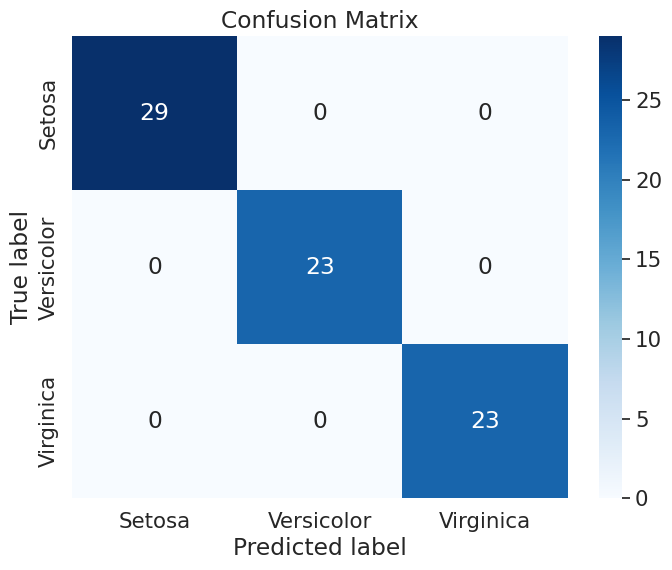

In [29]:
# Confusion matrix for testing data using seaborn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()